In [29]:
import os
import sys

module_path = os.path.abspath(os.path.join('../..'))

if module_path not in sys.path:
    sys.path.append(module_path)

# <center>Machine Learning Report</center>
### <center>Donato Meoli</center>
##### <center>d.meoli@studenti.unipi.it</center>

<center>Machine Learning course 654AA</center>
<center>Academic year: 2019/2020</center>

<center>Type of project: A with Computational Mathematics</center>

## Abstract

The aim of this project report is to briefly describe the contents of the **OptiML** library, for what about the ***ml*** module, and to show the training results on the *Monk's* classification problem, used as a benchmark for testing the learning models, and the model selection results on the **ML-CUP19** regression problem.

The latter refers to an academic competition within the Machine Learning course for which a **MEE** of **0.72** was achieved on the *evaluation set* (TS), the 20% of the whole dataset, using a **Support Vector Regression** with a **Laplacian kernel**. 

The model selection was done through a grid search for tuning the hyperparameters of the model and, for each combination of them, a 5 fold cross-validation was performed.

## Introduction

This software is a *sklearn compatible* implementation of *Support Vector Machines* and *Neural Networks*, both with some of the most successful features according to the state of art.

This work, in all its parts, was motivated by the possibility of being able to solve the optimization problem deriving from the mathematical formulation of the leraning models through a wide range of optimization algorithms object of study and developed for the *Computational Mathematics* course.

## Contents

The following learning models with the releated features are supported:

- ***Neural Networks***
    - Losses: *Mean Absolute Error* (L1 Loss), *Mean Squared Error* (L2 Loss), *Binary Cross Entropy*, *Categorical Cross Entropy* and *Sparse Categorical Cross Entropy*
    - Regularizers: L1 and L2
    - Activations: *Linear*, *Sigmoid*, *Tanh*, *ReLU*, *SoftMax*
    - Initializers: Xavier or Glorot normal and uniform
    - Optimizers
        - Line Search Methods: *Steepest Gradient Descent*, *Conjugate Gradient*, *BFGS*
        - Stochastic Methods: *Stochastic Gradient Descent*, *Adam*, *AdaDelta*, *AdaGrad*, *AdaMax*, *RProp*, *RMSProp* all with *standard* and *Nesterov momentum*, and learning rate *schedules* (*step decay*, *time-based decay*, *exponential* decay, etc.)
- ***Support Vector Machines***
    - SVC and SVR in their *primal formulation* with *Hinge* (L1 Loss) and *Squared Hinge* (L2 Loss), *Epsilon-Insensitive* (L1 Loss) and *Squared Epsilon-Insensitive* (L2 Loss) losses respectively
        - Optimizers: all those mentioned above for Neural Networks
    - SVC and SVR in their *Wolfe dual formulation* with *Linear*, *Polynomial*, *Gaussian*, *Laplacian* and *Sigmoid* kernels
        - Optimizers: *Projected Gradient*, *Frank-Wolfe*, *Active Set*, *Interior Point*, *Lagrangian Dual Relaxation* and *Sequential Minimal Optimization*

## Experiments

### Monk's Problem

In this first section of the report, we are going to show firstly how the implementation of both, *Support Vector Machines* and *Neural Networks*, works correctly on the Monk’s problem, used as a benchmark for the latter experiments. 

All these data have been preprocessed with a one-hot-encoding to make them linearly separable.

#### Support Vector Classifier

In case of *Support Vector Classifier* we are going to use the *Wolfe dual* formulation implementation also to show the kernel trick usage.

In [58]:
import numpy as np

from optiml.ml.svm import DualSVC
from optiml.ml.svm.kernels import PolyKernel, GaussianKernel

from optiml.opti.constrained.bcqp import *

from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

##### Monk #1

In [12]:
X, y = fetch_openml('monks-problems-1', return_X_y=True)
y = y.astype(np.float32)

X_train = OneHotEncoder(sparse=False).fit_transform(X[:124,:])
X_test = OneHotEncoder(sparse=False).fit_transform(X[124:,:])
y_train, y_test = y[:124], y[124:]

In [13]:
svc = DualSVC(kernel=PolyKernel(degree=3, gamma='scale'), 
              optimizer=ProjectedGradient, verbose=False)
svc.fit(X_train, y_train)
print(f'accuracy: {accuracy_score(y_test, svc.predict(X_test))}')

accuracy: 1.0


##### Monk #2

In [ ]:
X, y = fetch_openml('monks-problems-2', return_X_y=True)
y = y.astype(np.float32)

X_train = OneHotEncoder(sparse=False).fit_transform(X[:169,:])
X_test = OneHotEncoder(sparse=False).fit_transform(X[169:,:])
y_train, y_test = y[:169], y[169:]

In [63]:
svc = DualSVC(kernel=PolyKernel(degree=2, gamma='scale'), 
              optimizer=InteriorPoint, verbose=False)
svc.fit(X_train, y_train)
print(f'accuracy: {accuracy_score(y_test, svc.predict(X_test))}')

accuracy: 1.0


##### Monk #3

In [19]:
X, y = fetch_openml('monks-problems-3', return_X_y=True)
y = y.astype(np.float32)

X_train = OneHotEncoder(sparse=False).fit_transform(X[:122,:])
X_test = OneHotEncoder(sparse=False).fit_transform(X[122:,:])
y_train, y_test = y[:122], y[122:]

In [66]:
svc = DualSVC(kernel=GaussianKernel(gamma='auto'), C=100, 
              optimizer=ActiveSet, verbose=False)
svc.fit(X_train, y_train)
print(f'accuracy: {accuracy_score(y_test, svc.predict(X_test))}')

accuracy: 1.0


#### Neural Network Classifier

In case of *Neural Network Classifier* we are going to use different optimizers, both *stochastic* and *line search* methods, with different loss functions.

In [22]:
import numpy as np

from optiml.ml.neural_network import NeuralNetworkClassifier
from optiml.ml.neural_network.layers import FullyConnected
from optiml.ml.neural_network.activations import *
from optiml.ml.neural_network.losses import *
from optiml.ml.neural_network.regularizers import L2
from optiml.ml.utils import plot_model_loss, plot_model_accuracy

from optiml.opti.unconstrained.line_search import *
from optiml.opti.unconstrained.stochastic import *

from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

##### Monk #1

In [23]:
X, y = fetch_openml('monks-problems-1', return_X_y=True)
y = y.astype(np.float32)

X_train = OneHotEncoder(sparse=False).fit_transform(X[:124,:])
X_test = OneHotEncoder(sparse=False).fit_transform(X[124:,:])
y_train, y_test = y[:124], y[124:]

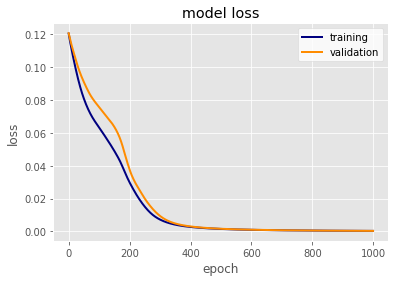

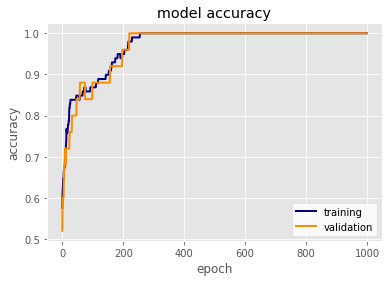

accuracy: 1.0


In [24]:
net = NeuralNetworkClassifier((FullyConnected(17, 5, sigmoid),
                               FullyConnected(5, 1, sigmoid)),
                              loss=mean_squared_error, optimizer=Adam, 
                              learning_rate_init=0.01, early_stopping=False, 
                              validation_split=0.2, max_iter=1000, verbose=False)
net.fit(X_train, y_train)
plot_model_loss(net.train_loss_history, net.val_loss_history)
plot_model_accuracy(net.train_score_history, net.val_score_history)
print(f'accuracy: {accuracy_score(y_test, net.predict(X_test))}')

##### Monk #2

In [ ]:
X, y = fetch_openml('monks-problems-2', return_X_y=True)
y = y.astype(np.float32)

X_train = OneHotEncoder(sparse=False).fit_transform(X[:169,:])
X_test = OneHotEncoder(sparse=False).fit_transform(X[169:,:])
y_train, y_test = y[:169], y[169:]

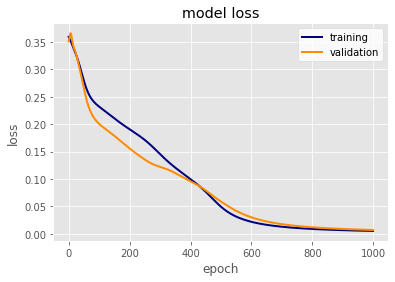

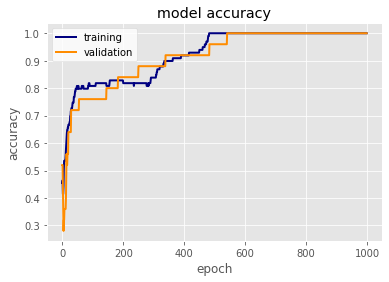

accuracy: 1.0


In [27]:
net = NeuralNetworkClassifier((FullyConnected(17, 5, sigmoid),
                               FullyConnected(5, 2, softmax)),
                              loss=sparse_categorical_cross_entropy, 
                              optimizer=StochasticGradientDescent, 
                              learning_rate_init=0.1, early_stopping=False, 
                              momentum_type='nesterov', momentum=0.9, 
                              validation_split=0.2,max_iter=1000, verbose=False)
net.fit(X_train, y_train)
plot_model_loss(net.train_loss_history, net.val_loss_history)
plot_model_accuracy(net.train_score_history, net.val_score_history)
print(f'accuracy: {accuracy_score(y_test, net.predict(X_test))}')

##### Monk #3

In [ ]:
X, y = fetch_openml('monks-problems-3', return_X_y=True)
y = y.astype(np.float32)

X_train = OneHotEncoder(sparse=False).fit_transform(X[:122,:])
X_test = OneHotEncoder(sparse=False).fit_transform(X[122:,:])
y_train, y_test = y[:122], y[122:]

In [50]:
net = NeuralNetworkClassifier((FullyConnected(17, 10, sigmoid, coef_reg=L2(0.01)),
                               FullyConnected(10, 1, sigmoid, coef_reg=L2(0.01))),
                              loss=mean_squared_error, optimizer=BFGS, 
                              max_iter=500, verbose=False)
net.fit(X_train, y_train)
print(f'accuracy: {accuracy_score(y_test, net.predict(X_test))}')

accuracy: 1.0


### ML-CUP19

In this second section of the report, we are going to show how to perform the grid search on ML-CUP19 to find the hyperparameters which best generalize the model on the unseen data.

In [84]:
import numpy as np

def load_ml_cup():
    ml_cup = np.delete(np.genfromtxt(module_path + '/optiml/ml/data/ML-CUP19/ML-CUP19-TR.csv', 
                                     delimiter=','), obj=0, axis=1)
    return ml_cup[:, :-2], ml_cup[:, -2:]

def load_ml_cup_blind():
    return np.delete(np.genfromtxt(module_path + '/optiml/ml/data/ML-CUP19/ML-CUP19-TS.csv',
                                   delimiter=','), obj=0, axis=1)

def mean_euclidean_error(y_true, y_pred):
    assert y_true.shape == y_pred.shape
    return np.mean(np.linalg.norm(y_pred - y_true, axis=1))

The hyperparameters which needs to be tuned are the kernel, the $\epsilon$-insensitive value, the regularization term $C$ and $\gamma$ which define how far the influence of a single training example reaches.

Defining the range of values that are typically chosen to perform an exhaustive grid search:

In [151]:
kernel_range = [gaussian, laplacian]
epsilon_range = [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5]
gamma_range = [0.0001, 0.001, 0.01, 0.1, 1, 'auto', 'scale']
C_range = [0.1, 1, 10, 100, 1000]

where the keywords 'auto' and 'scale' means 1 / n_features and 1 / (n_features * X.var()) respectively.

The dataset is divided into *development set* and *evaluation set* (TS) which corresponds to the 80% and 20% respectively.

Then, I performed a 5 fold cross validation which further divides the development set into *training* (TR) and *validation* (VL) set.

In [74]:
from optiml.ml.svm import DualSVR
from optiml.ml.svm.kernels import gaussian, laplacian

from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.multioutput import MultiOutputRegressor

X, y = load_ml_cup()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

tuned_parameters = [{'estimator__kernel': [gaussian],
                     'estimator__epsilon': epsilon_range,
                     'estimator__kernel_gamma': gamma_range,
                     'estimator__C': C_range},
                    {'estimator__kernel': [laplacian],
                     'estimator__epsilon': epsilon_range,
                     'estimator__kernel_gamma': ['auto'],
                     'estimator__C': C_range}]

neg_mean_euclidean_error = make_scorer(mean_euclidean_error, greater_is_better=False)

grid = GridSearchCV(MultiOutputRegressor(DualSVR()),
                    param_grid=tuned_parameters,
                    scoring=neg_mean_euclidean_error,
                    cv=5,  # 5 fold cross validation
                    n_jobs=-1,  # use all processors
                    refit=True,  # refit the best model on the full dataset
                    return_train_score=True,
                    verbose=True).fit(X_train, y_train)

Fitting 5 folds for each of 280 candidates, totalling 1400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   20.9s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   47.6s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 1400 out of 1400 | elapsed:  5.5min finished


The best parameter set found on development set and the best 30 estimators with their relative train (TR) and validation (VL) scores are:

In [76]:
import pandas as pd

df = pd.DataFrame(grid.cv_results_)[['param_estimator__kernel', 'param_estimator__epsilon', 
                                     'param_estimator__C', 'param_estimator__gamma', 
                                     'mean_train_score', 'mean_test_score', 
                                     'rank_test_score']].sort_values(by='rank_test_score')
df.rename(columns={'param_estimator__kernel': 'kernel',
                   'param_estimator__epsilon': 'epsilon',
                   'param_estimator__C': 'C',
                   'param_estimator__gamma': 'gamma',
                   'mean_test_score': 'mean_val_score',
                   'rank_test_score': 'rank_val_score'}, inplace=True)
df.mean_train_score *= -1
df.mean_val_score *= -1

def highlight_equal(s, value, column):
    is_max = pd.Series(data=False, index=s.index)
    is_max[column] = s.loc[column] == value
    return ['background-color: lightyellow' if is_max.any() else '' for v in is_max]

df.head(30).style.apply(highlight_equal, value=1, column=['rank_val_score'], axis=1).hide_index()

kernel,epsilon,C,gamma,mean_train_score,mean_val_score,rank_val_score
laplacian,0.001000,100,auto,0.006625,0.858940,1
laplacian,0.010000,100,auto,0.017097,0.858950,2
laplacian,0.010000,1000,auto,0.015714,0.861055,3
laplacian,0.001000,1000,auto,0.004072,0.861157,4
laplacian,0.100000,100,auto,0.133558,0.877077,5
laplacian,0.100000,1000,auto,0.133000,0.878102,6
laplacian,0.001000,10,auto,0.253727,0.879445,7
laplacian,0.010000,10,auto,0.260073,0.879689,8
laplacian,0.100000,10,auto,0.337951,0.894423,9
laplacian,0.200000,100,auto,0.254693,0.905453,10


Plot validation curve to visualize the performance metric over a range of values for some hyperparameters:

In [82]:
from optiml.ml.utils import plot_validation_curve

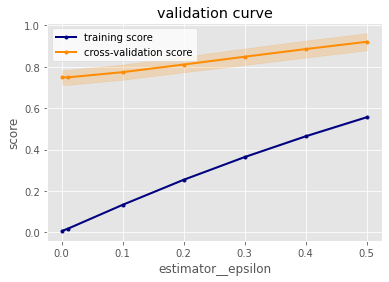

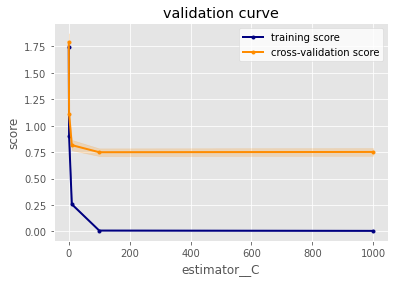

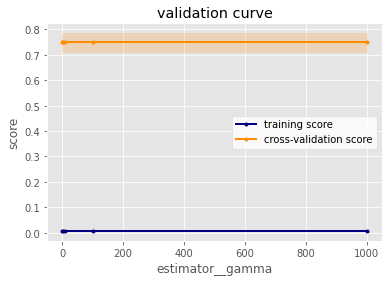

In [78]:
mean_euclidean_error = make_scorer(mean_euclidean_error)

plot_validation_curve(grid.best_estimator_, X, y, 'estimator__epsilon', epsilon_range, mean_euclidean_error)
plot_validation_curve(grid.best_estimator_, X, y, 'estimator__C', C_range, mean_euclidean_error)
plot_validation_curve(grid.best_estimator_, X, y, 'estimator__gamma', C_range, mean_euclidean_error)

Plot learning curve to visualize the effect of the number of observations on the performance metric:

In [79]:
from optiml.ml.utils import plot_validation_curve, plot_learning_curve

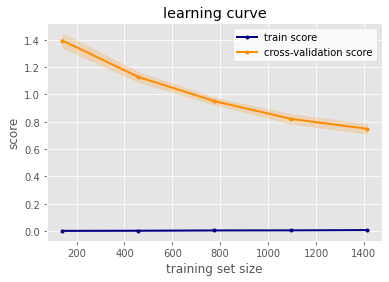

In [80]:
plot_learning_curve(grid.best_estimator_, X, y, mean_euclidean_error)

So, the MEE score on the *evaluation set* (TS) is:

In [85]:
mean_euclidean_error(grid.best_estimator_.predict(X_test), y_test)

0.7193331869375473

Finally, refit the best model on the whole dataset and then save the predictions over blind test set.

In [9]:
grid.best_estimator_.fit(X, y)
np.savetxt(module_path + '/optiml/ml/data/ML-CUP19/dmeoli_ML-CUP19-TS.csv', 
           grid.best_estimator_.predict(load_ml_cup_blind()), delimiter=',')

The predicted results with the best estimator found are available in the ***dmeoli_ML-CUP19-TS.csv*** file.

## Conclusions

The choice to train a SVR rather than a *Neural Network* was dictated by my personal fascination about the versatility of the SVM formulation in such differents ways. From the most immediate and simplest, i.e, as a *primal formulation* which gives rise to an unconstrained optimization problem, going from more complex and powerful formulation, i.e, as a constrained quadratic optimization problem deriving from the *Wolfe dual* of the primal problem; up to formulations as constraints relaxation, e.g., as an unconstrained quadratic optimization problem deriving from the *Lagrangian bi-dual relaxation* of the constraints in the Wolfe dual.

Also, for performance and efficiency reasons, the training phase over ML-CUP19 was done with a custom reimplementation of the Platt's *Sequential Minimal Optimization* algorithm [[1]](#ref-1) (see [[2]](#ref-2) for improvements) initially developed for the classification problem and then adapted [[3]](#ref-3) and improved [[4]](#ref-4) also for regression. According to the state of art, it is considered the best-known way to train a SVM in its *Wolfe dual* formulation since it breaks up the original large QP problem into a series of smallest possible problems, which are then solved analytically.

For what about the results on the Monk's problem, a simple training of the models, both SVC and Neural Network, can be seen in the first two cases, while, in the third and last case, a second order line search optimizer and a small L2 regularization has been added to improve the accuracy of the model in case of Neural Network and an higher C regularization parameter in case of SVC. 

Finally, for what about the grid search results on ML-CUP19, I noticed that the Laplacian kernel outperforms the Gaussian rbf. This is probably due to some noise in the data, in fact, the Laplacian distribution which has a more long-tail compared to the Gaussian and is nonsmooth in zero since it is computed using the 1-norm instead of the Euclidean norm, has proven useful in machine learning applied to noiseless data [[5]](#ref-5).

## Acknowledgements

I agree to the disclosure and publication of my name, and of the results with preliminary and final ranking.

## References



[[1]](#ref-1) John C. Platt. _Sequential Minimal Optimization: A Fast Algorithm for Training Support Vector Machines._

[[2]](#ref-2) S.S. Keerthi, S.K. Shevade, C. Bhattacharyya, K.R.K. Murthy. _Improvements to Platt's SMO Algorithm for SVM Classifier Design._

[[3]](#ref-3) G. W. Flake, S. Lawrence. _Efficient SVM Regression Training with SMO._

[[4]](#ref-4) S.K. Shevade, S.S. Keerthi, C. Bhattacharyya, K.R.K. Murthy. _Improvements to SMO Algorithm for SVM Regression._

[[5]](#ref-5) Matthias Rupp. _Machine learning for quantum mechanics in a nutshell._